In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

In [7]:
traj_data_filename = "C:\\Users\\ESA_Lab\\Desktop\\test2.csv"
traj_data = pd.read_csv(traj_data_filename).values

In [8]:

trace_1 = go.Scatter3d(x=traj_data[:,0], y=traj_data[:,1], z=traj_data[:,2], mode='lines', name='Ground Truth')

fig = go.Figure([
    trace_1
])

camera = dict(
    eye=dict(x=1, y=1, z=1)
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    scene_camera = camera,
    legend_orientation='h'
)

fig.update_scenes(
    aspectmode='data'
)

fig.show()

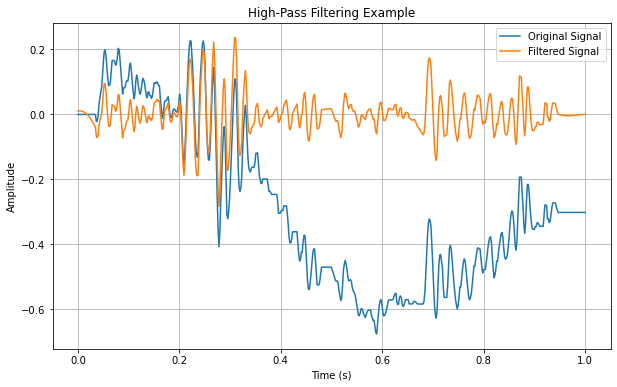

In [9]:
# Filter parameters
cutoff_freq = 2  # Cutoff frequency in Hz
fs = 100  # Sampling rate in Hz
order = 4  # Filter order

# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='highpass')  # <-- modify here

# Sample data (with time vector)
t = np.linspace(0, 1, traj_data.shape[0])  # Time vector for 1 second signal
datax = traj_data[:,0]
datay = traj_data[:,1]
dataz = traj_data[:,2]

# Apply the filter
filtered_datax = filtfilt(b, a, datax)
filtered_datay = filtfilt(b, a, datay)
filtered_dataz = filtfilt(b, a, dataz)

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, dataz, label='Original Signal')
plt.plot(t, filtered_dataz, label='Filtered Signal')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()

In [10]:

trace_1 = go.Scatter3d(x=filtered_datax, y=filtered_datay, z=filtered_dataz, mode='lines', name='Ground Truth')

fig = go.Figure([
    trace_1
])

camera = dict(
    eye=dict(x=1, y=1, z=1)
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    scene_camera = camera,
    legend_orientation='h'
)

fig.update_scenes(
    aspectmode='data'
)

fig.show()